<a href="https://colab.research.google.com/github/MeghanGH/data-analyst-with-python-datacamp/blob/main/Data_Manipulation_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import

In [245]:
import numpy as np
import pandas as pd

In [246]:
from google.colab import drive
drive.mount('/content/drive')
homelessness_csv = '/content/drive/My Drive/Colab Notebooks/Data-Analyst-with-Python/data/homelessness.csv'
sales_subset_csv = '/content/drive/My Drive/Colab Notebooks/Data-Analyst-with-Python/data/sales_subset.csv'
temperatures_csv = '/content/drive/My Drive/Colab Notebooks/Data-Analyst-with-Python/data/temperatures.csv'
avocado_csv = '/content/drive/My Drive/Colab Notebooks/Data-Analyst-with-Python/data/avocado.csv'
avocados_pkl= '/content/drive/My Drive/Colab Notebooks/Data-Analyst-with-Python/data/avocados.pkl'
airline_bumping_csv = '/content/drive/My Drive/Colab Notebooks/Data-Analyst-with-Python/data/airline_bumping.csv'

homelessness = pd.read_csv(homelessness_csv)
print(homelessness.head())

sales = pd.read_csv(sales_subset_csv)
print(sales.head())

temperatures = pd.read_csv(temperatures_csv)
print(temperatures.head())

avocado = pd.read_csv(avocado_csv)
print(avocado.head())

avocados = pd.read_pickle(avocados_pkl)
print(avocados.head())

airline_bumping = pd.read_csv(airline_bumping_csv)
print(airline_bumping.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Unnamed: 0              region       state  individuals  family_members  \
0           0  East South Central     Alabama       2570.0           864.0   
1           1             Pacific      Alaska       1434.0           582.0   
2           2            Mountain     Arizona       7259.0          2606.0   
3           3  West South Central    Arkansas       2280.0           432.0   
4           4             Pacific  California     109008.0         20964.0   

   state_pop  
0    4887681  
1     735139  
2    7158024  
3    3009733  
4   39461588  
   Unnamed: 0  store type  department        date  weekly_sales  is_holiday  \
0           0      1    A           1  2010-02-05      24924.50       False   
1           1      1    A           1  2010-03-05      21827.90       False   
2           2      1    A           1  2010-04-02      57258.43       False

# Transforming DataFrames

In [247]:
# Print the values of homelessness
print(homelessness.values)

# Print the column index of homelessness
print(homelessness.columns)

# Print the row index of homelessness
print(homelessness.index)

[[0 'East South Central' 'Alabama' 2570.0 864.0 4887681]
 [1 'Pacific' 'Alaska' 1434.0 582.0 735139]
 [2 'Mountain' 'Arizona' 7259.0 2606.0 7158024]
 [3 'West South Central' 'Arkansas' 2280.0 432.0 3009733]
 [4 'Pacific' 'California' 109008.0 20964.0 39461588]
 [5 'Mountain' 'Colorado' 7607.0 3250.0 5691287]
 [6 'New England' 'Connecticut' 2280.0 1696.0 3571520]
 [7 'South Atlantic' 'Delaware' 708.0 374.0 965479]
 [8 'South Atlantic' 'District of Columbia' 3770.0 3134.0 701547]
 [9 'South Atlantic' 'Florida' 21443.0 9587.0 21244317]
 [10 'South Atlantic' 'Georgia' 6943.0 2556.0 10511131]
 [11 'Pacific' 'Hawaii' 4131.0 2399.0 1420593]
 [12 'Mountain' 'Idaho' 1297.0 715.0 1750536]
 [13 'East North Central' 'Illinois' 6752.0 3891.0 12723071]
 [14 'East North Central' 'Indiana' 3776.0 1482.0 6695497]
 [15 'West North Central' 'Iowa' 1711.0 1038.0 3148618]
 [16 'West North Central' 'Kansas' 1443.0 773.0 2911359]
 [17 'East South Central' 'Kentucky' 2735.0 953.0 4461153]
 [18 'West South Cen

## Sorting and subsetting

In [248]:
homelessness.sort_values(['state', 'region'], ascending=[True, False]).head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
0,0,East South Central,Alabama,2570.0,864.0,4887681
1,1,Pacific,Alaska,1434.0,582.0,735139
2,2,Mountain,Arizona,7259.0,2606.0,7158024
3,3,West South Central,Arkansas,2280.0,432.0,3009733
4,4,Pacific,California,109008.0,20964.0,39461588


In [249]:
homelessness[['state', 'region']].head()

,state,region
0,Alabama,East South Central
1,Alaska,Pacific
2,Arizona,Mountain
3,Arkansas,West South Central
4,California,Pacific


In [250]:
homelessness[homelessness['individuals'] > 5000].head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
2,2,Mountain,Arizona,7259.0,2606.0,7158024
4,4,Pacific,California,109008.0,20964.0,39461588
5,5,Mountain,Colorado,7607.0,3250.0,5691287
9,9,South Atlantic,Florida,21443.0,9587.0,21244317
10,10,South Atlantic,Georgia,6943.0,2556.0,10511131


In [251]:
homelessness[homelessness['region'].isin(['Mountain', 'South Atlantic'])].head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
2,2,Mountain,Arizona,7259.0,2606.0,7158024
5,5,Mountain,Colorado,7607.0,3250.0,5691287
7,7,South Atlantic,Delaware,708.0,374.0,965479
8,8,South Atlantic,District of Columbia,3770.0,3134.0,701547
9,9,South Atlantic,Florida,21443.0,9587.0,21244317


 "and" operator (&)
 "or" operator (|)

In [252]:


# Filter for rows where family_members is less than 1000
# and region is Pacific
fam_lt_1k_pac = homelessness[(homelessness['family_members'] < 1000) & (homelessness['region'].isin(['Pacific']))]

# See the result
print(fam_lt_1k_pac.head())

   Unnamed: 0   region   state  individuals  family_members  state_pop
1           1  Pacific  Alaska       1434.0           582.0     735139


In [253]:

# Subset for rows in South Atlantic or Mid-Atlantic regions
south_mid_atlantic = homelessness[(homelessness['region'].isin(['South Atlantic'])) | homelessness['region'].isin(['Mid-Atlantic'])]

# See the result
print(south_mid_atlantic.head())

    Unnamed: 0          region                 state  individuals  \
7            7  South Atlantic              Delaware        708.0   
8            8  South Atlantic  District of Columbia       3770.0   
9            9  South Atlantic               Florida      21443.0   
10          10  South Atlantic               Georgia       6943.0   
20          20  South Atlantic              Maryland       4914.0   

    family_members  state_pop  
7            374.0     965479  
8           3134.0     701547  
9           9587.0   21244317  
10          2556.0   10511131  
20          2230.0    6035802  


In [254]:
# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]

# Filter for rows in the Mojave Desert states
mojave_homelessness = homelessness[homelessness['state'].isin(canu)]

# See the result
print(mojave_homelessness)

    Unnamed: 0    region       state  individuals  family_members  state_pop
2            2  Mountain     Arizona       7259.0          2606.0    7158024
4            4   Pacific  California     109008.0         20964.0   39461588
28          28  Mountain      Nevada       7058.0           486.0    3027341
44          44  Mountain        Utah       1904.0           972.0    3153550


## **Adding a new column**

In [255]:
# Add total col as sum of individuals and family_members
homelessness['total'] = homelessness['individuals'] + homelessness['family_members']

# Add p_individuals col as proportion of total that are individuals
homelessness['p_individuals'] = homelessness['individuals']/homelessness['total']

# See the result
print(homelessness.head())

   Unnamed: 0              region       state  individuals  family_members  \
0           0  East South Central     Alabama       2570.0           864.0   
1           1             Pacific      Alaska       1434.0           582.0   
2           2            Mountain     Arizona       7259.0          2606.0   
3           3  West South Central    Arkansas       2280.0           432.0   
4           4             Pacific  California     109008.0         20964.0   

   state_pop     total  p_individuals  
0    4887681    3434.0       0.748398  
1     735139    2016.0       0.711310  
2    7158024    9865.0       0.735834  
3    3009733    2712.0       0.840708  
4   39461588  129972.0       0.838704  


In [256]:
# Create indiv_per_10k col as homeless individuals per 10k state pop
homelessness["indiv_per_10k"] = 10000 * homelessness['individuals'] / homelessness['state_pop']

# Subset rows for indiv_per_10k greater than 20
high_homelessness = homelessness[homelessness["indiv_per_10k"] > 20]

# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values('indiv_per_10k', ascending=False)

# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_srt[['state','indiv_per_10k']]

# See the result
print(result)

                   state  indiv_per_10k
8   District of Columbia      53.738381
11                Hawaii      29.079406
4             California      27.623825
37                Oregon      26.636307
28                Nevada      23.314189
47            Washington      21.829195
32              New York      20.392363


# Aggregating DataFrames

## **Summary Statistics**
.agg()
.cumsum()

In [257]:
homelessness['indiv_per_10k'].min()

3.435065849943979

In [258]:
def pct30(column):
  return column.quantile(0.3)

homelessness['individuals'].agg(pct30)

1745.0

In [259]:
homelessness[['individuals', 'state_pop']].agg(pct30)

individuals       1745.0
state_pop      2092741.0
dtype: float64

In [260]:
homelessness['individuals'].agg([pct30, 'std'])

pct30     1745.000000
std      15991.025083
Name: individuals, dtype: float64

In [261]:
homelessness['individuals'].cumsum().head()


0      2570.0
1      4004.0
2     11263.0
3     13543.0
4    122551.0
Name: individuals, dtype: float64

In [262]:
sales.head()

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [263]:
# Print the maximum of the date column
print(sales['date'].max())

# Print the minimum of the date column
print(sales['date'].min())

# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Print IQR of the temperature_c column
print(sales['temperature_c'].agg(iqr))

# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr,np.median]))

2012-10-26
2010-02-05
16.583333333333336
        temperature_c  fuel_price_usd_per_l  unemployment
iqr         16.583333              0.073176         0.565
median      16.966667              0.743381         8.099


## **Cumulative statistics**

Cumulative sum for each group.

In [264]:
# Sort sales_1_1 by date
sales_1_1 = sales.sort_values('date', ascending=True)

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1['cum_weekly_sales'] = sales_1_1['weekly_sales'].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1['cum_max_sales'] = sales_1_1['weekly_sales'].cummax()

# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

             date  weekly_sales  cum_weekly_sales  cum_max_sales
0      2010-02-05      24924.50      2.492450e+04       24924.50
6437   2010-02-05      38597.52      6.352202e+04       38597.52
1249   2010-02-05       3840.21      6.736223e+04       38597.52
6449   2010-02-05      17590.59      8.495282e+04       38597.52
6461   2010-02-05       4929.87      8.988269e+04       38597.52
...           ...           ...               ...            ...
3592   2012-10-05        440.00      2.568932e+08      293966.05
8108   2012-10-05        660.00      2.568938e+08      293966.05
10773  2012-10-05        915.00      2.568947e+08      293966.05
6257   2012-10-12          3.00      2.568947e+08      293966.05
3384   2012-10-26        -21.63      2.568947e+08      293966.05

[10774 rows x 4 columns]


In [265]:
sales.head()

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [266]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=['store','type'])
print(store_types.head())

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=['store', 'department'])
print(store_depts.head())

# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales['is_holiday'] == True].drop_duplicates(subset=['date'])

# Print date col of holiday_dates
print(holiday_dates['date'])

      Unnamed: 0  store type  department        date  weekly_sales  \
0              0      1    A           1  2010-02-05      24924.50   
901          901      2    A           1  2010-02-05      35034.06   
1798        1798      4    A           1  2010-02-05      38724.42   
2699        2699      6    A           1  2010-02-05      25619.00   
3593        3593     10    B           1  2010-02-05      40212.84   

      is_holiday  temperature_c  fuel_price_usd_per_l  unemployment  
0          False       5.727778              0.679451         8.106  
901        False       4.550000              0.679451         8.324  
1798       False       6.533333              0.686319         8.623  
2699       False       4.683333              0.679451         7.259  
3593       False      12.411111              0.782478         9.765  
    Unnamed: 0  store type  department        date  weekly_sales  is_holiday  \
0            0      1    A           1  2010-02-05      24924.50       False   

In [267]:
# Count the number of stores of each type
store_counts = sales['store'].value_counts()
print(store_counts)

# Get the proportion of stores of each type
store_props = sales['store'].value_counts(normalize=True)
print(store_props)

# Count the number of each department number and sort
dept_counts_sorted = sales['department'].value_counts(sort=True)
print(dept_counts_sorted)

# Get the proportion of departments of each number and sort
dept_props_sorted = sales['department'].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

13    913
20    910
19    906
10    902
1     901
4     901
27    900
2     897
6     894
31    890
14    885
39    875
Name: store, dtype: int64
13    0.084741
20    0.084463
19    0.084091
10    0.083720
1     0.083627
4     0.083627
27    0.083534
2     0.083256
6     0.082978
31    0.082606
14    0.082142
39    0.081214
Name: store, dtype: float64
1     144
55    144
71    144
67    144
60    144
     ... 
50     72
78     56
77     39
39      7
43      2
Name: department, Length: 80, dtype: int64
1     0.013366
55    0.013366
71    0.013366
67    0.013366
60    0.013366
        ...   
50    0.006683
78    0.005198
77    0.003620
39    0.000650
43    0.000186
Name: department, Length: 80, dtype: float64


## **Grouped summary statistics**

sales.groupby("type")["weekly_sales"].sum() = groupby type select sum of weekly_sales

In [268]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales['type'] == 'B']['weekly_sales'].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales['type'] == 'C']['weekly_sales'].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.9097747 0.0902253 0.       ]


In [269]:
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = sales_by_type / sum(sales['weekly_sales'])
print(sales_propn_by_type)

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64


In [270]:
# From previous step
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(['type', 'is_holiday'])['weekly_sales'].sum()
print(sales_by_type_is_holiday)

type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64


In [271]:
# Import numpy with the alias np
import numpy as np

# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby('type')['weekly_sales'].agg([np.min, np.max, np.mean, np.median])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby(['store', 'type'])[['unemployment','fuel_price_usd_per_l']].agg([np.min, np.max, np.mean, np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

        amin       amax          mean    median
type                                           
A    -1098.0  293966.05  23674.667242  11943.92
B     -798.0  232558.51  25696.678370  13336.08
           unemployment                         fuel_price_usd_per_l  \
                   amin   amax      mean median                 amin   
store type                                                             
1     A           6.573  8.106  7.849257  7.808             0.677602   
2     A           6.170  8.324  8.156532  8.163             0.664129   
4     A           3.879  8.623  7.535630  7.372             0.670997   
6     A           5.329  7.259  7.034975  7.007             0.676545   
10    B           7.170  9.765  9.279323  9.199             0.760023   
13    A           5.621  8.316  7.941028  7.951             0.704283   
14    A           8.424  8.992  8.795390  8.743             0.713001   
19    A           7.658  8.350  8.118392  8.099             0.749456   
20    A         

## Pivot table
default of agg is mean


df.pivot_table(values='number', index='column wants to group')

In [272]:
# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(values='weekly_sales', index='type', aggfunc=[np.mean,np.median])

# Print mean_med_sales_by_type
print(mean_med_sales_by_type)

              mean       median
      weekly_sales weekly_sales
type                           
A     23674.667242     11943.92
B     25696.678370     13336.08


In [273]:
# Pivot for mean weekly_sales by store type and holiday
mean_sales_by_type_holiday = sales.pivot_table(values='weekly_sales', index='type', columns='is_holiday')

# Print mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)

is_holiday         False      True 
type                               
A           23768.583523  590.04525
B           25751.980533  810.70500


In [274]:
# Pivot multiple column

sales.pivot_table(values='weekly_sales', index=['type', 'is_holiday'], aggfunc=[np.mean,np.median])

mean       median
                 weekly_sales weekly_sales
type is_holiday                           
A    False       23768.583523    12028.955
     True          590.045250       37.500
B    False       25751.980533    13348.680
     True          810.705000      810.705

In [275]:
# Print the mean weekly_sales by department and type; fill missing values with 0s
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0))

# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0, margins=True))

#margin = aggregates across the categories on the rows and columns.
#default agg of pivot table is mean.

type                    A              B
department                              
1            30961.725379   44050.626667
2            67600.158788  112958.526667
3            17160.002955   30580.655000
4            44285.399091   51219.654167
5            34821.011364   63236.875000
...                   ...            ...
95          123933.787121   77082.102500
96           21367.042857    9528.538333
97           28471.266970    5828.873333
98           12875.423182     217.428333
99             379.123659       0.000000

[80 rows x 2 columns]
type                   A              B           All
department                                           
1           30961.725379   44050.626667  32052.467153
2           67600.158788  112958.526667  71380.022778
3           17160.002955   30580.655000  18278.390625
4           44285.399091   51219.654167  44863.253681
5           34821.011364   63236.875000  37189.000000
...                  ...            ...           ...
96          

# Slicing and Indexing DataFrames


### Setting and removing indexes

In [276]:
# Look at temperatures
print(temperatures.head())

# Set the index of temperatures to city
temperatures_ind = temperatures.set_index("city")

# Look at temperatures_ind
print(temperatures_ind.head())

# Reset the temperatures_ind index, keeping its contents
print(temperatures_ind.reset_index())

# Reset the temperatures_ind index, dropping its contents
print(temperatures_ind.reset_index(drop=True))

   Unnamed: 0        date     city        country  avg_temp_c
0           0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1           1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2           2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3           3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4           4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
         Unnamed: 0        date        country  avg_temp_c
city                                                      
Abidjan           0  2000-01-01  Côte D'Ivoire      27.293
Abidjan           1  2000-02-01  Côte D'Ivoire      27.685
Abidjan           2  2000-03-01  Côte D'Ivoire      29.061
Abidjan           3  2000-04-01  Côte D'Ivoire      28.162
Abidjan           4  2000-05-01  Côte D'Ivoire      27.547
          city  Unnamed: 0        date        country  avg_temp_c
0      Abidjan           0  2000-01-01  Côte D'Ivoire      27.293
1      Abidjan           1  2000-02-01  Côte D'Ivoire      27.685
2      Abidjan   

### Subsetting with .loc[]

In [277]:
# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]

# Subset temperatures using square brackets
print(temperatures[temperatures["city"].isin(cities)])

# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])

       Unnamed: 0        date              city country  avg_temp_c
10725       10725  2000-01-01            Moscow  Russia      -7.313
10726       10726  2000-02-01            Moscow  Russia      -3.551
10727       10727  2000-03-01            Moscow  Russia      -1.661
10728       10728  2000-04-01            Moscow  Russia      10.096
10729       10729  2000-05-01            Moscow  Russia      10.357
...           ...         ...               ...     ...         ...
13360       13360  2013-05-01  Saint Petersburg  Russia      12.355
13361       13361  2013-06-01  Saint Petersburg  Russia      17.185
13362       13362  2013-07-01  Saint Petersburg  Russia      17.234
13363       13363  2013-08-01  Saint Petersburg  Russia      17.153
13364       13364  2013-09-01  Saint Petersburg  Russia         NaN

[330 rows x 5 columns]
                  Unnamed: 0        date country  avg_temp_c
city                                                        
Moscow                 10725  2000-01-

### Setting multi-level indexes

Indexes can also be made out of multiple columns, forming a multi-level index (sometimes called a hierarchical index). There is a trade-off to using these.

The benefit is that multi-level indexes make it more natural to reason about nested categorical variables. For example, in a clinical trial, you might have control and treatment groups. Then each test subject belongs to one or another group, and we can say that a test subject is nested inside the treatment group. Similarly, in the temperature dataset, the city is located in the country, so we can say a city is nested inside the country.

In [278]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(["country", "city"])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [("Brazil", "Rio De Janeiro"), ("Pakistan","Lahore")]

# Subset for rows to keep
print(temperatures_ind.loc[rows_to_keep])

                         Unnamed: 0        date  avg_temp_c
country  city                                              
Brazil   Rio De Janeiro       12540  2000-01-01      25.974
         Rio De Janeiro       12541  2000-02-01      26.699
         Rio De Janeiro       12542  2000-03-01      26.270
         Rio De Janeiro       12543  2000-04-01      25.750
         Rio De Janeiro       12544  2000-05-01      24.356
...                             ...         ...         ...
Pakistan Lahore                8575  2013-05-01      33.457
         Lahore                8576  2013-06-01      34.456
         Lahore                8577  2013-07-01      33.279
         Lahore                8578  2013-08-01      31.511
         Lahore                8579  2013-09-01         NaN

[330 rows x 3 columns]


### Sorting by index values

In [279]:
# Sort temperatures_ind by index values
print(temperatures_ind.sort_index())

# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level="city"))

# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level=["country", "city"], ascending = [True, False]))

                    Unnamed: 0        date  avg_temp_c
country     city                                      
Afghanistan Kabul         7260  2000-01-01       3.326
            Kabul         7261  2000-02-01       3.454
            Kabul         7262  2000-03-01       9.612
            Kabul         7263  2000-04-01      17.925
            Kabul         7264  2000-05-01      24.658
...                        ...         ...         ...
Zimbabwe    Harare        5605  2013-05-01      18.298
            Harare        5606  2013-06-01      17.020
            Harare        5607  2013-07-01      16.299
            Harare        5608  2013-08-01      19.232
            Harare        5609  2013-09-01         NaN

[16500 rows x 3 columns]
                       Unnamed: 0        date  avg_temp_c
country       city                                       
Côte D'Ivoire Abidjan           0  2000-01-01      27.293
              Abidjan           1  2000-02-01      27.685
              Abidjan      

## Slicing and subsetting with .loc and .iloc

### Slicing index values

In [280]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

# Subset rows from Pakistan to Russia
print(temperatures_srt.loc['Pakistan':'Russia'])

# Try to subset rows from Lahore to Moscow
print(temperatures_srt.loc["Lahore" : "Moscow"])

# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_srt.loc[("Pakistan", "Lahore"):("Russia", "Moscow")])

                           Unnamed: 0        date  avg_temp_c
country  city                                                
Pakistan Faisalabad              4785  2000-01-01      12.792
         Faisalabad              4786  2000-02-01      14.339
         Faisalabad              4787  2000-03-01      20.309
         Faisalabad              4788  2000-04-01      29.072
         Faisalabad              4789  2000-05-01      34.845
...                               ...         ...         ...
Russia   Saint Petersburg       13360  2013-05-01      12.355
         Saint Petersburg       13361  2013-06-01      17.185
         Saint Petersburg       13362  2013-07-01      17.234
         Saint Petersburg       13363  2013-08-01      17.153
         Saint Petersburg       13364  2013-09-01         NaN

[1155 rows x 3 columns]
                    Unnamed: 0        date  avg_temp_c
country city                                          
Mexico  Mexico           10230  2000-01-01      12.694
    

### Slicing in both directions

In [281]:
# Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_srt.loc[('India', 'Hyderabad') : ('Iraq','Baghdad')])

# Subset columns from date to avg_temp_c
print(temperatures_srt.loc[:, 'date':'avg_temp_c'])

# Subset in both directions at once
print(temperatures_srt.loc[('India', 'Hyderabad') : ('Iraq','Baghdad'), 'date':'avg_temp_c'])

                   Unnamed: 0        date  avg_temp_c
country city                                         
India   Hyderabad        5940  2000-01-01      23.779
        Hyderabad        5941  2000-02-01      25.826
        Hyderabad        5942  2000-03-01      28.821
        Hyderabad        5943  2000-04-01      32.698
        Hyderabad        5944  2000-05-01      32.438
...                       ...         ...         ...
Iraq    Baghdad          1150  2013-05-01      28.673
        Baghdad          1151  2013-06-01      33.803
        Baghdad          1152  2013-07-01      36.392
        Baghdad          1153  2013-08-01      35.463
        Baghdad          1154  2013-09-01         NaN

[2145 rows x 3 columns]
                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kab

### Slicing time series

Slicing is particularly useful for time series since it's a common thing to want to filter for data within a date range. Add the date column to the index, then use .loc[] to perform the subsetting. The important thing to remember is to keep your dates in ISO 8601 format, that is, "yyyy-mm-dd" for year-month-day, "yyyy-mm" for year-month, and "yyyy" for year.

**Incorrect Submission**

Be careful when using Boolean conditions to subset dates.

Using a check like df['date'] == '2011' or df['date'] <= '2011'
will not check for all dates in 2011,

and will only check for the date 2011-01-01.
**Write out the full date when using Boolean conditions** (e.g. 2011-12-31).

In [282]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures['date'] >= '2010-01-01') & (temperatures['date'] <= '2011-12-31')]
print(temperatures_bool)

# Set date as the index and sort the index
temperatures_ind = temperatures.set_index('date').sort_index()

# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc['2010':'2011'])

# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc['2010-08':'2011-02'])

       Unnamed: 0        date     city        country  avg_temp_c
120           120  2010-01-01  Abidjan  Côte D'Ivoire      28.270
121           121  2010-02-01  Abidjan  Côte D'Ivoire      29.262
122           122  2010-03-01  Abidjan  Côte D'Ivoire      29.596
123           123  2010-04-01  Abidjan  Côte D'Ivoire      29.068
124           124  2010-05-01  Abidjan  Côte D'Ivoire      28.258
...           ...         ...      ...            ...         ...
16474       16474  2011-08-01     Xian          China      23.069
16475       16475  2011-09-01     Xian          China      16.775
16476       16476  2011-10-01     Xian          China      12.587
16477       16477  2011-11-01     Xian          China       7.543
16478       16478  2011-12-01     Xian          China      -0.490

[2400 rows x 5 columns]
            Unnamed: 0        city    country  avg_temp_c
date                                                     
2010-01-01        4905  Faisalabad   Pakistan      11.810
2010-01-0

### Subsetting by row/column number

In [283]:
# Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[(22,1)])

# Use slicing to get the first 5 rows
print(temperatures.iloc[:5])

# Use slicing to get columns 3 to 4
print(temperatures.iloc[:, 2:4])

# Use slicing in both directions at once
print(temperatures.iloc[:5, 2:4])

2001-11-01
   Unnamed: 0        date     city        country  avg_temp_c
0           0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1           1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2           2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3           3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4           4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
          city        country
0      Abidjan  Côte D'Ivoire
1      Abidjan  Côte D'Ivoire
2      Abidjan  Côte D'Ivoire
3      Abidjan  Côte D'Ivoire
4      Abidjan  Côte D'Ivoire
...        ...            ...
16495     Xian          China
16496     Xian          China
16497     Xian          China
16498     Xian          China
16499     Xian          China

[16500 rows x 2 columns]
      city        country
0  Abidjan  Côte D'Ivoire
1  Abidjan  Côte D'Ivoire
2  Abidjan  Côte D'Ivoire
3  Abidjan  Côte D'Ivoire
4  Abidjan  Côte D'Ivoire


## Working with pivot tables

### Pivot temperature by city and year

You can access the components of a date (year, month and day) using code of the form dataframe["column"].dt.component.

For example, the month component is dataframe["column"].dt.month,

and the year component is dataframe["column"].dt.year.

In [284]:
temperatures

,Unnamed: 0,date,city,country,avg_temp_c
0,0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,4,2000-05-01,Abidjan,Côte D'Ivoire,27.547
...,...,...,...,...,...
16495,16495,2013-05-01,Xian,China,18.979
16496,16496,2013-06-01,Xian,China,23.522
16497,16497,2013-07-01,Xian,China,25.251
16498,16498,2013-08-01,Xian,China,24.528


In [285]:
# AttributeError: Can only use .dt accessor with datetimelike values
temperatures['date'] = pd.to_datetime(temperatures['date'], errors='coerce')

# Add a year column to temperatures
temperatures['year'] = temperatures['date'].dt.year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table('avg_temp_c', index=('country','city'), columns='year')

# See the result
print(temp_by_country_city_vs_year.head())

year                        2000       2001       2002       2003       2004  \
country     city                                                               
Afghanistan Kabul      15.822667  15.847917  15.714583  15.132583  16.128417   
Angola      Luanda     24.410333  24.427083  24.790917  24.867167  24.216167   
Australia   Melbourne  14.320083  14.180000  14.075833  13.985583  13.742083   
            Sydney     17.567417  17.854500  17.733833  17.592333  17.869667   
Bangladesh  Dhaka      25.905250  25.931250  26.095000  25.927417  26.136083   

year                        2005       2006       2007       2008       2009  \
country     city                                                               
Afghanistan Kabul      14.847500  15.798500  15.518000  15.479250  15.093333   
Angola      Luanda     24.414583  24.138417  24.241583  24.266333  24.325083   
Australia   Melbourne  14.378500  13.991083  14.991833  14.110583  14.647417   
            Sydney     18.028083  17.74

### Subsetting pivot tables

In [286]:
# Subset for Egypt to India
temp_by_country_city_vs_year.loc['Egypt' : 'India']

# Subset for Egypt, Cairo to India, Delhi
temp_by_country_city_vs_year.loc[('Egypt', 'Cairo') : ('India', 'Delhi')]

# Subset for Egypt, Cairo to India, Delhi, and 2005 to 2010
temp_by_country_city_vs_year.loc[('Egypt', 'Cairo') : ('India', 'Delhi'), '2005':'2010']

year                       2005       2006       2007       2008       2009  \
country  city                                                                 
Egypt    Cairo        22.006500  22.050000  22.361000  22.644500  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.644500  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.165000  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.278250  11.464083   
Germany  Berlin        9.919083  10.545333  10.883167  10.657750  10.062500   
India    Ahmadabad    26.828083  27.282833  27.511167  27.048500  28.095833   
         Bangalore    25.476500  25.418250  25.464333  25.352583  25.725750   
         Bombay       27.035750  27.381500  27.634667  27.177750  27.844500   
         Calcutta     26.729167  26.986250  26.584583  26.522333  27.153250   
         Delhi        25.716083  26.365917  26.145667  25.675000  26.554250   

year                       2010  
country  city                    
Egypt    Cairo        23.718250  
         Gizeh        23.718250  
Ethiopia Addis Abeba  18.298250  
France   Paris        10.409833  
Germany  Berlin        8.606833  
India    Ahmadabad    28.017833  
         Bangalore    25.705250  
         Bombay       27.765417  
         Calcutta     27.288833  
         Delhi        26.520250

### Calculating on a pivot table

In [287]:
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean()

# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year >= mean_temp_by_year.max()])

# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis='columns')

# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city <= mean_temp_by_city.min()])

year
2013    20.312285
dtype: float64
country  city  
China    Harbin    4.876551
dtype: float64


#Visualizing DataFrames

## Which avocado size is most popular?: Bar plot

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


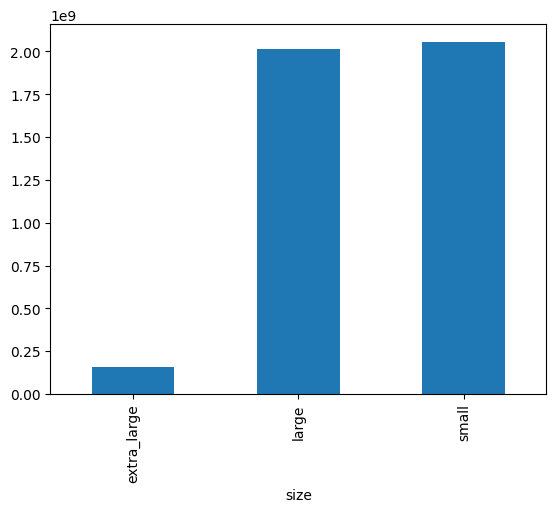

In [288]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind='bar')

# Show the plot
plt.show()

## Changes in sales over time : line plot

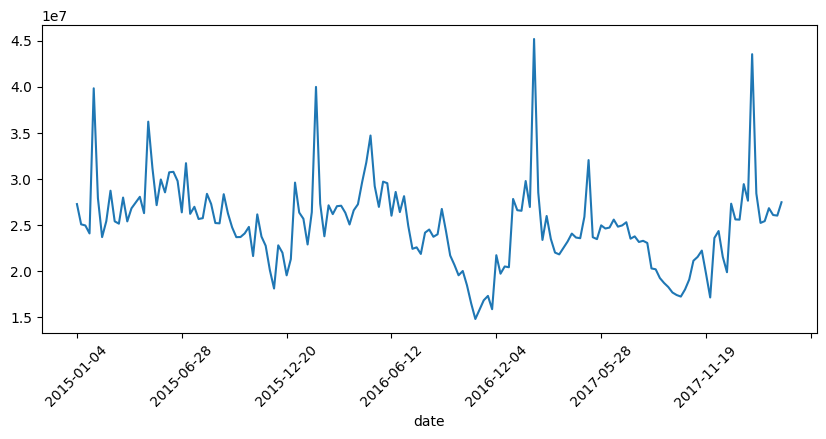

In [289]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(x='date', y='nb_sold',kind='line', figsize=(10,4), rot=45)

# Show the plot
plt.show()

## Scatter plot of avg_price vs. nb_sold with title

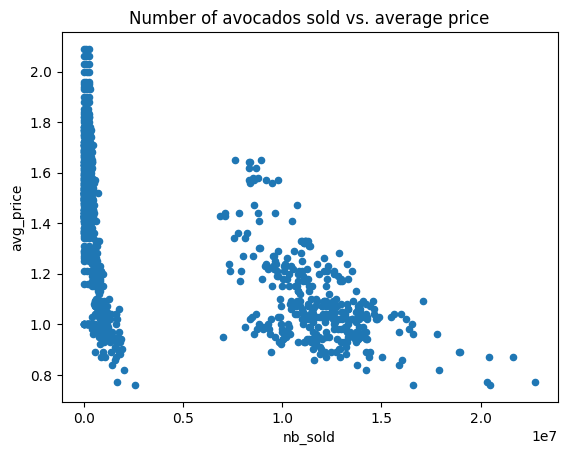

In [290]:
# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(x='nb_sold', y='avg_price', kind='scatter', title="Number of avocados sold vs. average price")

# Show the plot
plt.show()

## Price of conventional vs. organic avocados: hist()

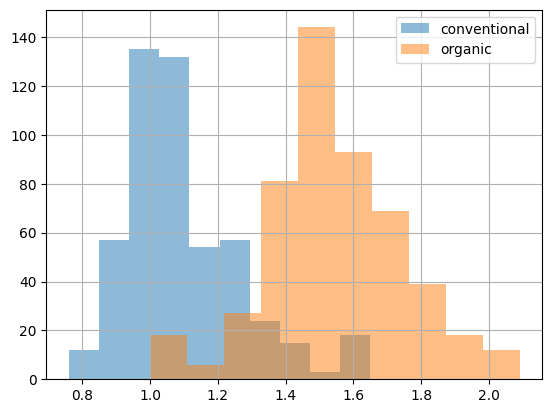

In [291]:
# Modify histogram transparency to 0.5
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5)

# Modify histogram transparency to 0.5
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

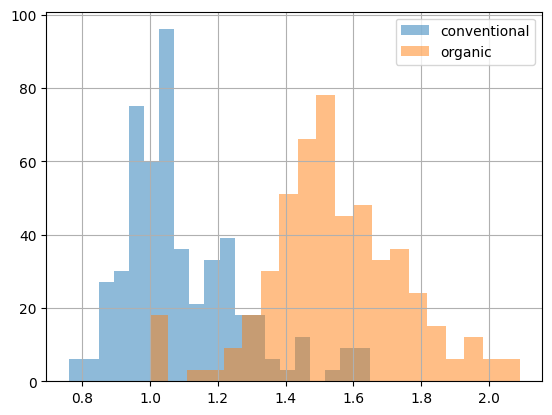

In [292]:
# Modify bins to 20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# Modify bins to 20
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

# Missing values handled

## Finding missing values: df.isna()

In [293]:
avocados['date'] = pd.to_datetime(avocados['date'])
avocados_timeindex = avocados.set_index('date', drop=True)
avocados_2016 = avocados_timeindex['2016']
avocados_2016.head()

<ipython-input-293-4adb90c8cd58>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  avocados_2016 = avocados_timeindex['2016']


,type,year,avg_price,size,nb_sold
date,,,,,
2016-12-25,conventional,2016,1.00,small,9255125.20
2016-12-18,conventional,2016,0.96,small,9394065.91
2016-12-11,conventional,2016,0.98,small,9009996.11
2016-12-04,conventional,2016,1.00,small,11043350.90
2016-11-27,conventional,2016,1.21,small,7891487.94


type         0
year         0
avg_price    0
size         0
nb_sold      0
dtype: int64
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


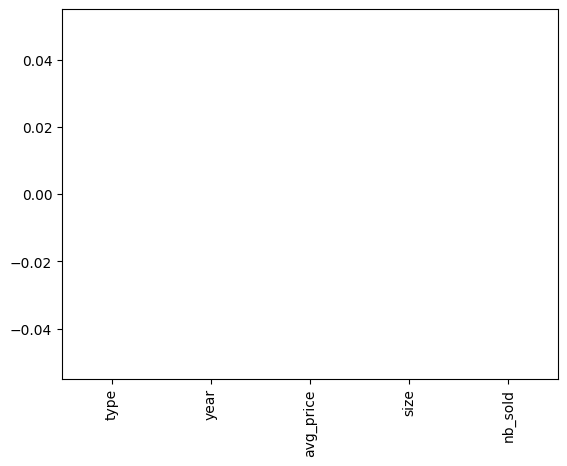

In [294]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Check individual values for missing values
print(avocados_2016.isna().sum())

# Check each column for missing values
print(avocados_2016.isna().any())

# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind='bar')

# Show plot
plt.show()

## Removing missing values : df.dropna()

In [295]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


## Replacing missing values: df.fillna()

In this exercise, you'll see how replacing missing values can affect the distribution of a variable using histograms. You can plot histograms for multiple variables at a time as follows:

dogs[["height_cm", "weight_kg"]].hist()

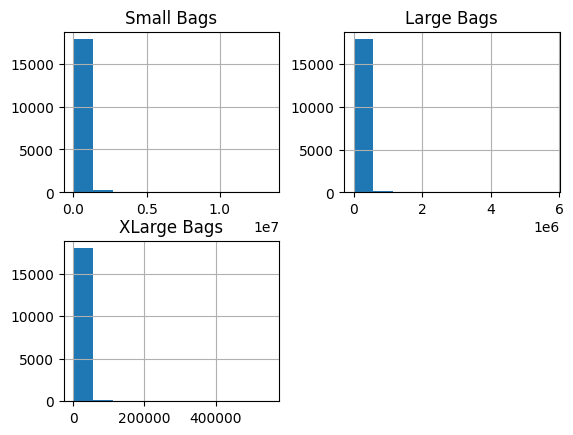

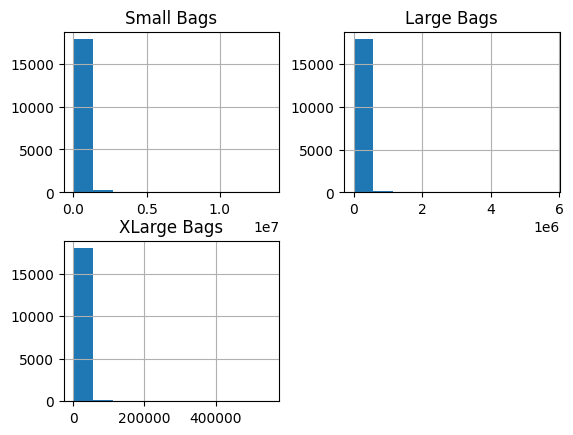

In [296]:
# List the columns with missing values
cols_with_missing = ["Small Bags", "Large Bags", "XLarge Bags"]

# Create histograms showing the distributions cols_with_missing
avocado[cols_with_missing].hist()

# Fill in missing values with 0
avocados_filled = avocado.fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()

# Show the plot
plt.show()

# Creating DataFrames


*   Dictionary = {'key':value }
*   List = []



## List of dictionaries

In [297]:
# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


## Dictionary of lists

*   Key = column name
*   Value = list of column values



In [298]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17","2019-12-01"],
  "small_sold": [10859987,9291631],
  "large_sold": [7674135,6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096


## CSV to DataFrame

In [299]:
# From previous steps

print(airline_bumping.head())
airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()
airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000

# Print airline_totals
print(airline_totals)

             airline  year  nb_bumped  total_passengers
0    DELTA AIR LINES  2017        679          99796155
1     VIRGIN AMERICA  2017        165           6090029
2    JETBLUE AIRWAYS  2017       1475          27255038
3    UNITED AIRLINES  2017       2067          70030765
4  HAWAIIAN AIRLINES  2017         92           8422734
                     nb_bumped  total_passengers  bumps_per_10k
airline                                                        
ALASKA AIRLINES           1392          36543121       0.380920
AMERICAN AIRLINES        11115         197365225       0.563169
DELTA AIR LINES           1591         197033215       0.080748
EXPRESSJET AIRLINES       3326          27858678       1.193883
FRONTIER AIRLINES         1228          22954995       0.534960
HAWAIIAN AIRLINES          122          16577572       0.073593
JETBLUE AIRWAYS           3615          53245866       0.678926
SKYWEST AIRLINES          3094          47091737       0.657015
SOUTHWEST AIRLINES      

## DataFrame to CSV

In [300]:
# Create airline_totals_sorted
airline_totals_sorted = airline_totals.sort_values('bumps_per_10k', ascending=False)

# Print airline_totals_sorted
print(airline_totals_sorted)

# Save as airline_totals_sorted.csv
airline_totals_sorted.to_csv("airline_totals_sorted.csv")

                     nb_bumped  total_passengers  bumps_per_10k
airline                                                        
EXPRESSJET AIRLINES       3326          27858678       1.193883
SPIRIT AIRLINES           2920          32304571       0.903897
SOUTHWEST AIRLINES       18585         228142036       0.814624
JETBLUE AIRWAYS           3615          53245866       0.678926
SKYWEST AIRLINES          3094          47091737       0.657015
AMERICAN AIRLINES        11115         197365225       0.563169
FRONTIER AIRLINES         1228          22954995       0.534960
ALASKA AIRLINES           1392          36543121       0.380920
UNITED AIRLINES           4941         134468897       0.367446
VIRGIN AMERICA             242          12017967       0.201365
DELTA AIR LINES           1591         197033215       0.080748
HAWAIIAN AIRLINES          122          16577572       0.073593
